In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/Lottery_Powerball_Winning_Numbers__Beginning_2010.csv')
data

,Draw Date,Winning Numbers,Multiplier
0,09/26/2020,11 21 27 36 62 24,3.0
1,09/30/2020,14 18 36 49 67 18,2.0
2,10/03/2020,18 31 36 43 47 20,2.0
3,10/07/2020,06 24 30 53 56 19,2.0
4,10/10/2020,05 18 23 40 50 18,3.0
...,...,...,...
1827,08/25/2025,16 19 34 37 64 22,3.0
1828,08/27/2025,09 12 22 41 61 25,4.0
1829,08/30/2025,03 18 22 27 33 17,3.0
1830,09/01/2025,08 23 25 40 53 05,3.0


In [6]:
data = data.set_index('Draw Date')
data

,Winning Numbers,Multiplier
Draw Date,,
09/26/2020,11 21 27 36 62 24,3.0
09/30/2020,14 18 36 49 67 18,2.0
10/03/2020,18 31 36 43 47 20,2.0
10/07/2020,06 24 30 53 56 19,2.0
10/10/2020,05 18 23 40 50 18,3.0
...,...,...
08/25/2025,16 19 34 37 64 22,3.0
08/27/2025,09 12 22 41 61 25,4.0
08/30/2025,03 18 22 27 33 17,3.0


In [18]:
#Check if duplicated values
print(f"Any duplicated values for winning numbers: {data.duplicated('Winning Numbers').sum()}")
print(f"Any duplicated values for multipliers: {data.duplicated('Multiplier').sum()}")

Any duplicated values for winning numbers: 0
Any duplicated values for multipliers: 1826


<Axes: xlabel='Multiplier', ylabel='count'>

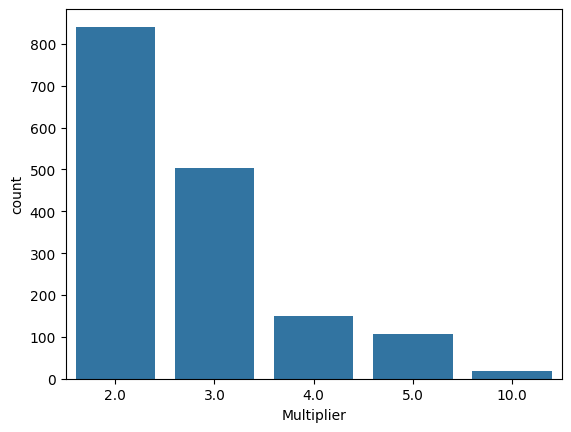

In [19]:
#Multiplier statistics
sns.countplot(data, x='Multiplier')

<Axes: xlabel='Draw Date', ylabel='Multiplier'>

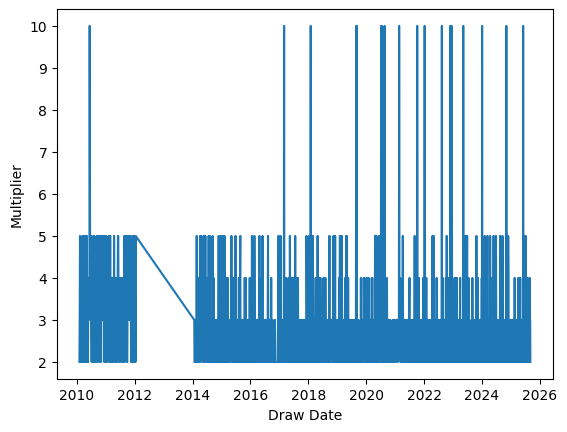

In [24]:
data.index = pd.to_datetime(data.index)
sns.lineplot(data, x = data.index, y='Multiplier')

<Axes: ylabel='Draw Date'>

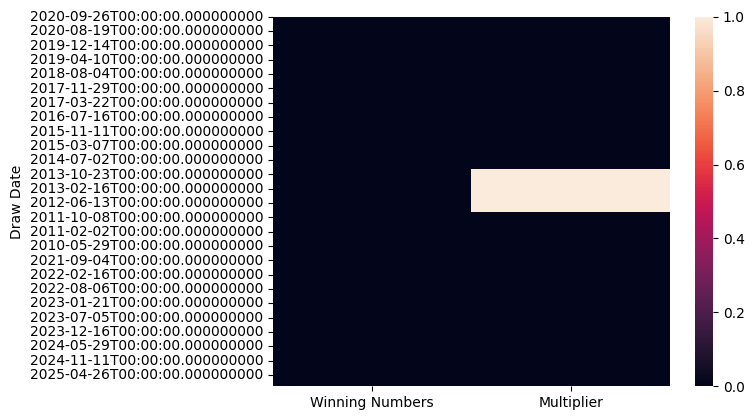

In [26]:
#Possible reduction of multipliers. 
sns.heatmap(data.isnull())

In [27]:
data.head()

,Winning Numbers,Multiplier
Draw Date,,
2020-09-26,11 21 27 36 62 24,3.0
2020-09-30,14 18 36 49 67 18,2.0
2020-10-03,18 31 36 43 47 20,2.0
2020-10-07,06 24 30 53 56 19,2.0
2020-10-10,05 18 23 40 50 18,3.0


In [32]:
data['Month'] = data.index.month_name()
data

,Winning Numbers,Multiplier,Month
Draw Date,,,
2020-09-26,11 21 27 36 62 24,3.0,September
2020-09-30,14 18 36 49 67 18,2.0,September
2020-10-03,18 31 36 43 47 20,2.0,October
2020-10-07,06 24 30 53 56 19,2.0,October
2020-10-10,05 18 23 40 50 18,3.0,October
...,...,...,...
2025-08-25,16 19 34 37 64 22,3.0,August
2025-08-27,09 12 22 41 61 25,4.0,August
2025-08-30,03 18 22 27 33 17,3.0,August


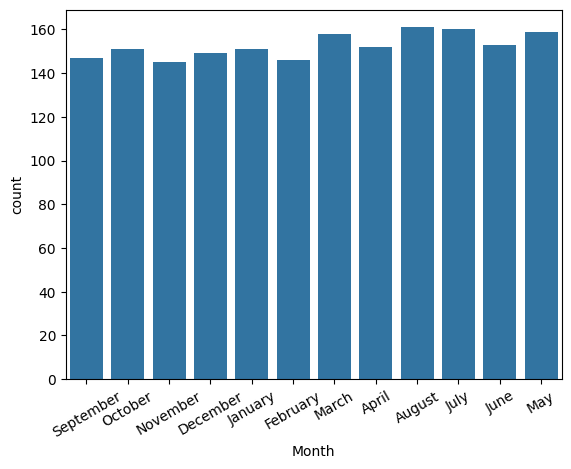

In [36]:
ax = sns.countplot(data, x=data.Month)
plt.xticks(rotation = 30)
plt.show()

In [ ]:
data_month = data.groupby(['Month']).count()
data_month

/var/folders/bj/p18ygv1s6wbg6865d00fd5h80000gn/T/ipykernel_1815/1282561910.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_month = data.groupby(['Month']).count()


,Winning Numbers,Multiplier
Month,,
April,152,136
August,161,143
December,149,132
February,146,129
January,151,132
July,160,143
June,153,135
March,158,140
May,159,141


In [59]:
numbers = data['Winning Numbers'].str.split(' ', expand=True).stack().astype(int)
numbers.value_counts().head()

23    225
21    222
24    215
20    213
11    211
Name: count, dtype: int64

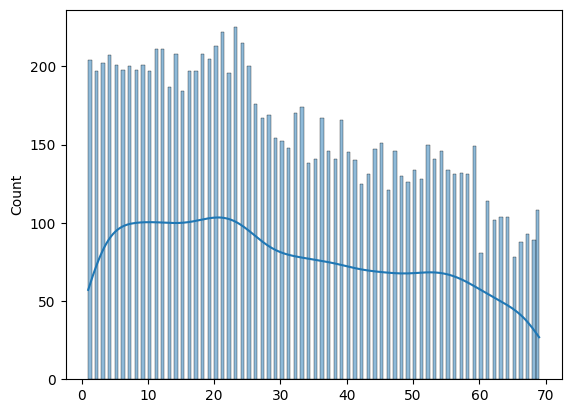

In [64]:
sns.histplot(numbers, binwidth=0.5, kde = True)
plt.show()